In [ ]:
#   https://www.kaggle.com/datasets/salader/dogs-vs-cats
#   from the following link you can download the dataset 
#   it is present in Kaggle
#   https://github.com/Rvaibhavv/deep_learning/blob/main/CatVsDog.ipynb

In [1]:
import zipfile
zip_ref =zipfile.ZipFile('C:/Users/rvaib/Downloads/archive (1).zip')
zip_ref.extractall('C:/Users/rvaib/onedrive/Desktop/deep_learning/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
# from keras.layers import Dense,Conv2D,MaxPool2D,Flatten


In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='C:/Users/rvaib/OneDrive/Desktop/deep_learning/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='C:/Users/rvaib/OneDrive/Desktop/deep_learning/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# normalizing the image from '0 - 255' to 0-1
def process(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)

In [13]:
model = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
    layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    layers.Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')

])



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']


)
history =model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 91ms/step - loss: 0.6125 - accuracy: 0.6534 - val_loss: 0.5166 - val_accuracy: 0.7550
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4552 - accuracy: 0.7860 - val_loss: 0.4688 - val_accuracy: 0.7838
Epoch 3/10
625/625 [==============================] - 77s 123ms/step - loss: 0.3370 - accuracy: 0.8489 - val_loss: 0.4965 - val_accuracy: 0.8026
Epoch 4/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2104 - accuracy: 0.9126 - val_loss: 0.6349 - val_accuracy: 0.7936
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1080 - accuracy: 0.9585 - val_loss: 0.8736 - val_accuracy: 0.7894
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0707 - accuracy: 0.9741 - val_loss: 0.8334 - val_accuracy: 0.7818
Epoch 7/10
625/625 [==============================] - 51s 81ms/step - loss: 0.0522 - accuracy: 0.9816 - val_loss: 1.0437 - val_accuracy

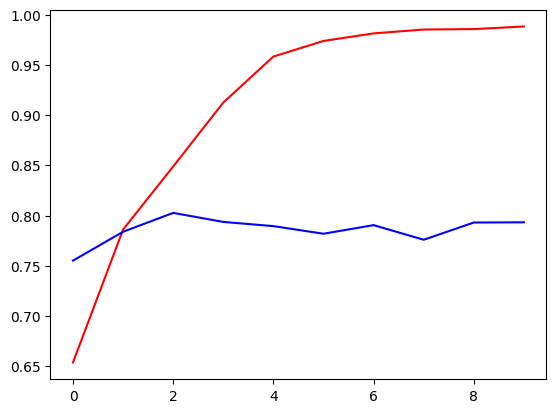

In [17]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


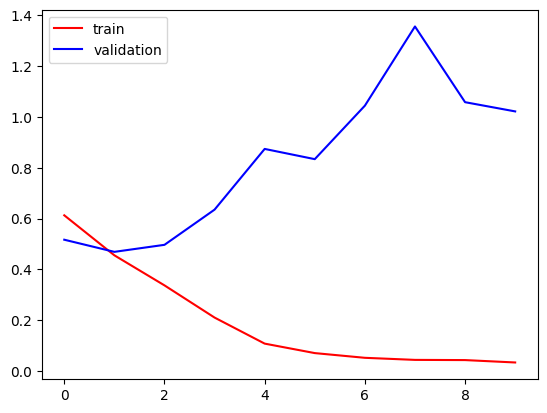

In [18]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()